In [1]:
import pandas as pd
import numpy as np

In [2]:
insulin=pd.read_csv('insulin_dosage_adjustments.csv')
insulin.head()

,Weight,Current Insulin Dose,Ave. Carb Intake,Illness/Stress,Activity Level,Current Blood Sugar,Target Blood Sugar,Adjusted Dose
0,35,14,331,1,0,350,180,8
1,46,18,407,3,0,336,180,7
2,61,24,521,0,2,275,180,9
3,69,28,556,3,0,238,180,5
4,14,6,95,1,0,114,140,-2


In [3]:
X=insulin[['Weight', 'Current Insulin Dose', 'Ave. Carb Intake', 'Illness/Stress', 'Activity Level', 'Current Blood Sugar', 'Target Blood Sugar']].values
y=insulin[['Adjusted Dose']].values
X

array([[ 35,  14, 331, ...,   0, 350, 180],
       [ 46,  18, 407, ...,   0, 336, 180],
       [ 61,  24, 521, ...,   2, 275, 180],
       ...,
       [ 56,  22, 391, ...,   1, 108, 180],
       [ 35,  14, 325, ...,   0, 336, 180],
       [118,  47, 906, ...,   0, 195, 180]])

In [4]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(y)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from keras.models import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(units=5, input_dim=7, activation='relu'))

model.add(Dense(units=5, activation='relu'))

model.add(Dense(1))

c:\Users\Emad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [9]:
history = model.fit(X_train, y_train ,batch_size = 20, validation_split=0.2, epochs = 150, verbose=1)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1569 - val_loss: 1.0456
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1365 - val_loss: 0.9788
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0175 - val_loss: 0.9255
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9878 - val_loss: 0.8768
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8322 - val_loss: 0.8265
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8077 - val_loss: 0.7737
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7781 - val_loss: 0.7183
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7693 - val_loss: 0.6582
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6833 - val_loss: 0.5969
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6676 - val_loss: 0.5335
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5161 - val_loss: 0.4779
Epoch 12/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4

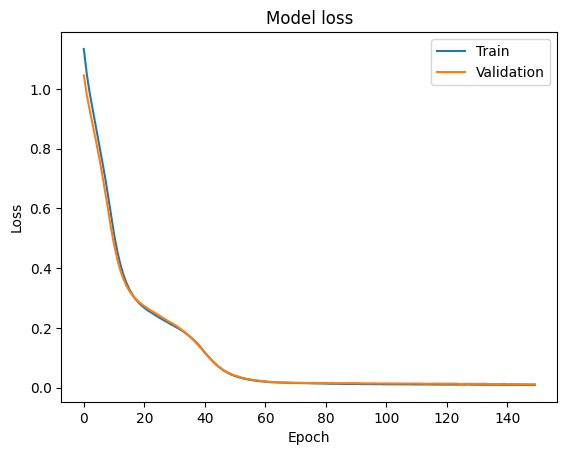

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [11]:
y_pred = model.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

0.014629824536135795

In [13]:
np.array([[1,1,1,1,1,1,1]])
y_pred = model.predict(X)
y_pred

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[ 5.40942311e-01],
       [ 5.28556705e-01],
       [ 3.73918414e-01],
       [ 9.82595682e-02],
       [-2.81112194e-01],
       [-1.43398154e+00],
       [-2.10587168e+00],
       [ 7.99387932e-01],
       [ 8.22418213e-01],
       [ 1.30690992e+00],
       [-2.22939873e+00],
       [ 2.01403713e+00],
       [ 2.56748080e-01],
       [-4.43590045e-01],
       [-7.05250144e-01],
       [-1.30336678e+00],
       [-3.09920311e-01],
       [ 4.30157781e-02],
       [ 2.73808241e-02],
       [-7.33808637e-01],
       [ 2.59388685e-02],
       [-8.76241088e-01],
       [-8.20225358e-01],
       [-4.74091887e-01],
       [ 1.61148667e-01],
       [ 1.49162459e+00],
       [-4.45544362e-01],
       [ 3.26500475e-01],
       [ 4.78944659e-01],
       [-1.26067984e+00],
       [ 6.82003498e-01],
       [-1.46696317e+00],
       [-9.38355088e-01],
       [ 6.35091960e-01],
       [ 2.08972979e+00],
       [ 1.52089024e+00],
       [-8.24709773e-01],
       [-1.87173450e+00],
       [ 1.2

In [14]:
import speech_recognition as sr
 
def speech_to_text():
    recognizer = sr.Recognizer()
 
    with sr.Microphone() as source:
        print("Listening... Please speak now.")
        recognizer.adjust_for_ambient_noise(source)  
        audio = recognizer.listen(source)  
 
        try:
            text = recognizer.recognize_google(audio)
            print("You said: " + text)
            return text  
        except sr.UnknownValueError:
            print("Sorry, I couldn't understand your speech.")
            return None
        except sr.RequestError:
            print("Request error. Please check your internet connection.")
            return None

numbers = []
number_words = {"zero": 0,"one": 1,"two": 2,"three": 3,"four": 4,"five": 5,"six": 6,"seven": 7,"eight": 8,"nine": 9,"ten": 10, "eleven": 11, "twelve": 12 }
data=['Weight', 'Current Insulin Dose', 'Ave. Carb Intake', 'Illness/Stress', 'Activity Level', 'Current Blood Sugar', 'Target Blood Sugar']
def listening(i):
    while i < 7 :
        print(f"What is your {data[i]}")
        
        captured_text = speech_to_text()
        if captured_text:
            try:
                number = int(captured_text)  
                numbers.append(number) 
            except ValueError :
                if(captured_text in number_words):
                    numbers.append(number_words[captured_text])
                else:  
                    listening(i)
                    i=100
        else:
            listening(i)
            i=100
        i+=1
listening(0)
print("Array of numbers:", numbers)

new_data = np.array([numbers])
new_data_scaled = scaler_X.transform(new_data) 
y_pred_scaled = history.model.predict(new_data_scaled) 
y_pred = scaler_y.inverse_transform(y_pred_scaled)
print(f"Unnormalized Prediction: {y_pred[0][0]}")

What is your Weight
Listening... Please speak now.
You said: play some jazz
What is your Weight
Listening... Please speak now.
Sorry, I couldn't understand your speech.
What is your Weight
Listening... Please speak now.
You said: parmesan
What is your Weight
Listening... Please speak now.
Sorry, I couldn't understand your speech.
What is your Weight
Listening... Please speak now.
You said: 22
What is your Current Insulin Dose
Listening... Please speak now.
You said: eight
What is your Ave. Carb Intake
Listening... Please speak now.
You said: 80
What is your Illness/Stress
Listening... Please speak now.
You said: 25
What is your Activity Level
Listening... Please speak now.
You said: 33
What is your Current Blood Sugar
Listening... Please speak now.
You said: hamburger
What is your Current Blood Sugar
Listening... Please speak now.
Sorry, I couldn't understand your speech.
What is your Current Blood Sugar
Listening... Please speak now.
You said: set alarm for 7:10 a.m.
What is your Curr